In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' , header = 1)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
dataset.isnull().any(axis = 1).sum()

2

In [5]:
dataset.loc[:122 , "Region"] = 0
dataset.loc[122: , "Region"] = 1

df = dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df['Region'] = df['Region'].astype(int)

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
df = df.dropna().reset_index(drop = True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df = df.drop(122).reset_index(drop = True)

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [13]:
df.columns = df.columns.str.strip()

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [16]:
df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
df.to_csv("Algerian_forest_fires_cleaned_dataset.csv" , index = False)


## EDA

In [18]:
df_copy = df.drop(['day' , 'month' , 'year'] , axis = 1)

In [19]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [21]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [22]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [23]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [24]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

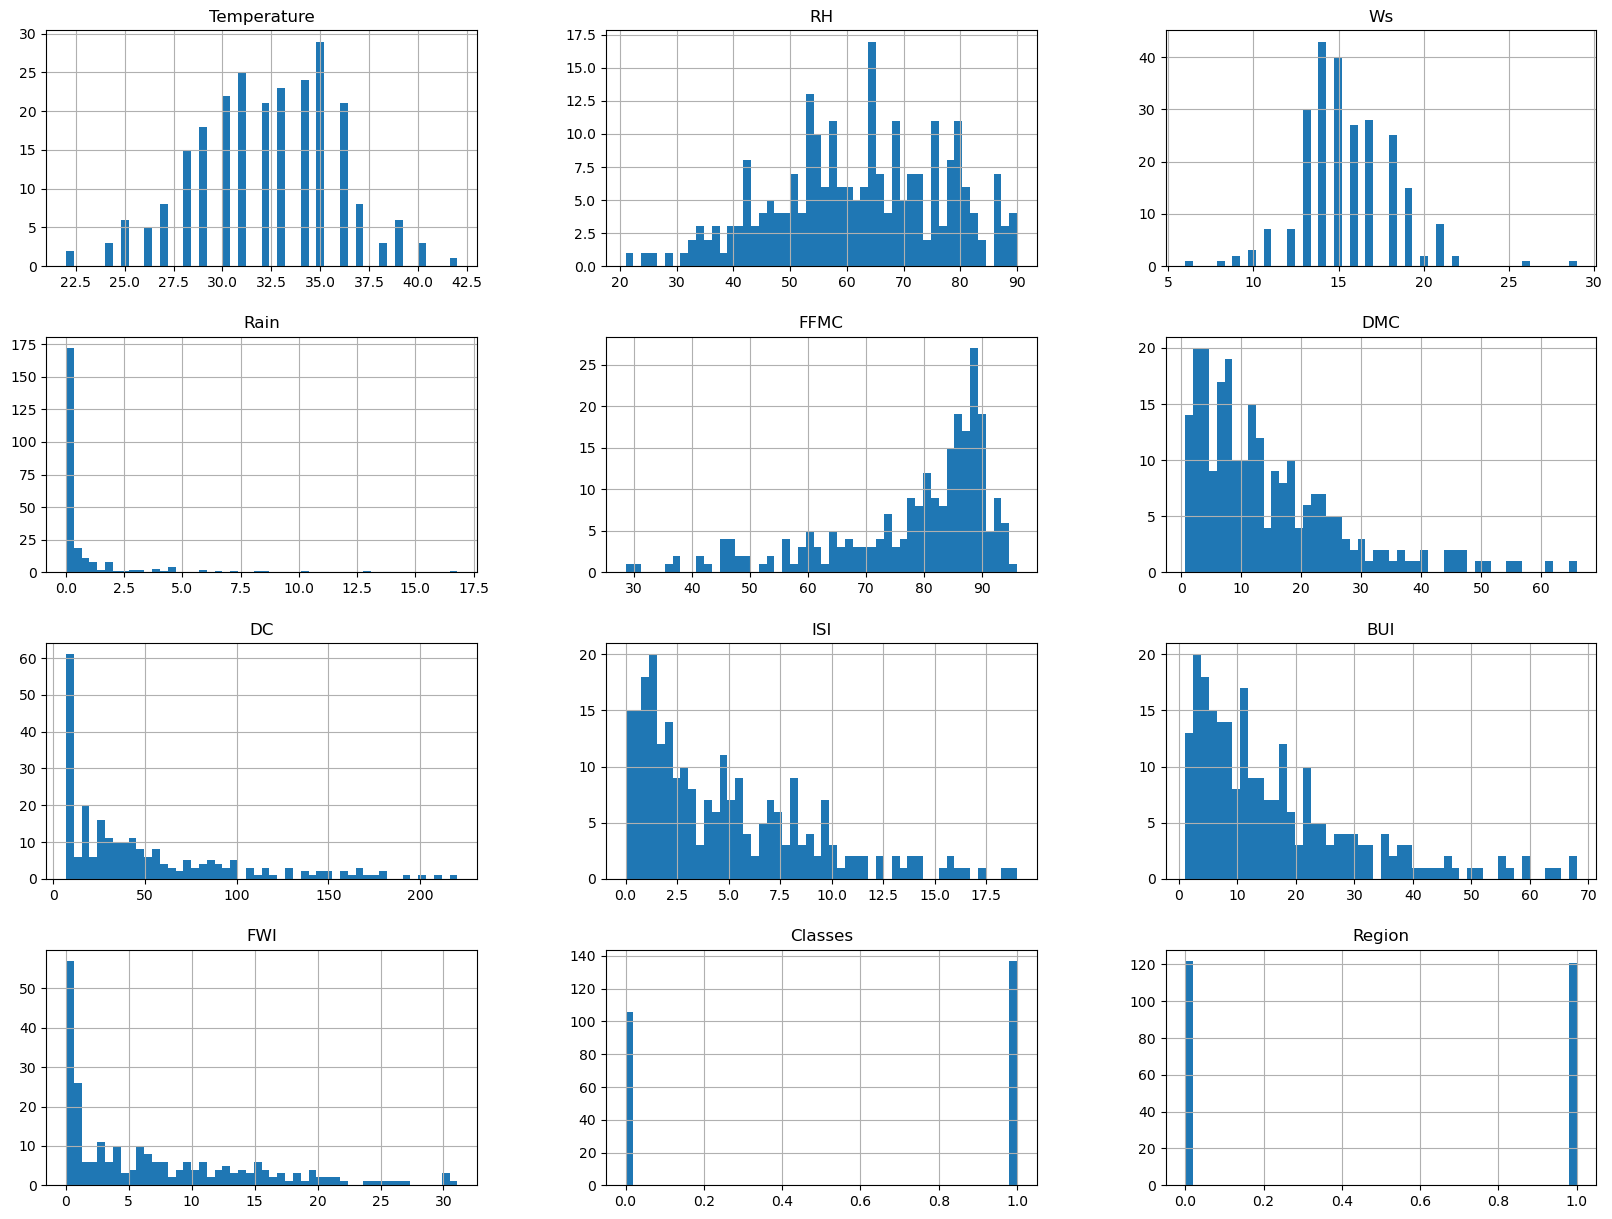

In [25]:
#plt.style.use('seaborn')
df_copy.hist(bins = 50 ,figsize = (20,15))
plt.show()

In [26]:
percentage = df_copy['Classes'].value_counts(normalize = True)*100

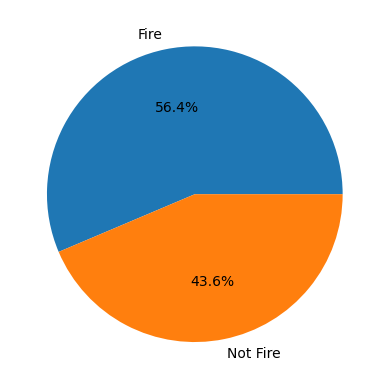

In [27]:
classlabels = ['Fire' , 'Not Fire']

plt.pie(x = percentage , labels = classlabels ,autopct= '%1.1f%%' )
plt.show()

In [28]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot: >

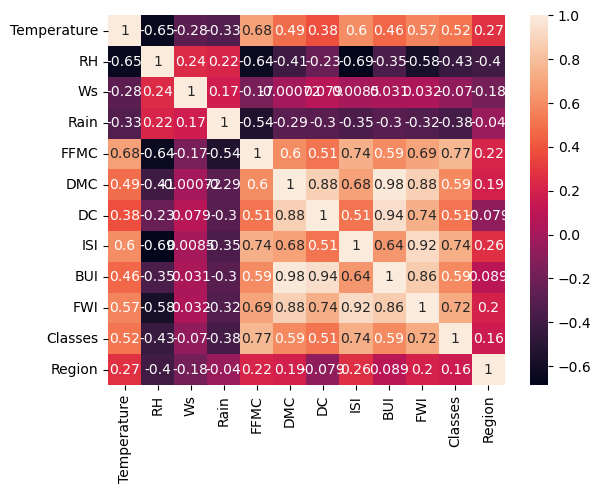

In [29]:
sns.heatmap(df_copy.corr() , annot = True)

## dividng dataset into independent and dependent features

In [30]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [31]:
x = df_copy.drop(columns = ['FWI'])
y = df_copy["FWI"]

## Test and Train split

In [32]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state =10 )


In [33]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [34]:
y_train.shape , y_test.shape

((182,), (61,))

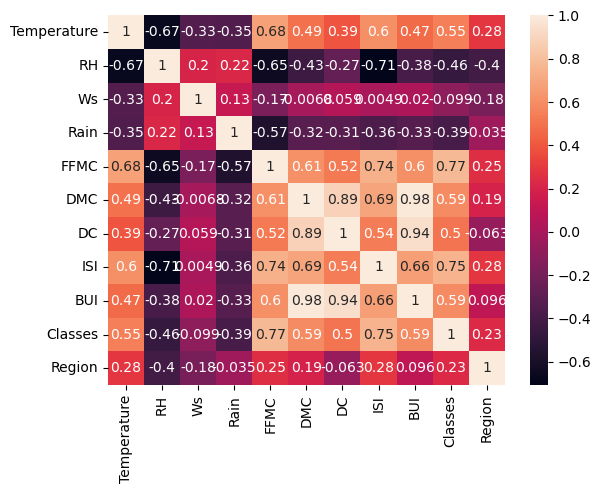

In [35]:
corr = sns.heatmap(x_train.corr() , annot = True)

In [36]:
## Feature Selection

In [37]:
def correlation(data , threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
                
    return col_corr

In [38]:
corr_features = correlation(x_train , 0.85)

In [39]:
corr_features

{'BUI', 'DC'}

In [40]:
x_train.drop(corr_features , axis = 1 , inplace = True)
x_test.drop(corr_features , axis = 1 , inplace = True)

In [41]:
x_train.shape , x_test.shape

((182, 9), (61, 9))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
x_train_scaled

array([[-0.82246204, -0.13248758, -0.96126494, ..., -0.8800242 ,
        -1.0921406 , -1.        ],
       [-1.64946806,  1.26631775,  2.29867702, ..., -1.04641643,
        -1.0921406 , -1.        ],
       [ 1.38288736, -1.73112224, -0.96126494, ...,  1.66339986,
         0.91563303,  1.        ],
       ...,
       [ 0.28021266, -2.46382979, -0.96126494, ...,  2.25765782,
         0.91563303,  1.        ],
       [-0.54679336,  0.06734175, -0.59904916, ..., -0.59478038,
        -1.0921406 ,  1.        ],
       [-1.09813071,  1.06648841, -1.32348071, ..., -0.80871325,
        -1.0921406 , -1.        ]])

## Box plots to understand the effect of standardscaler

/tmp/ipykernel_1293/2074631860.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scalling')

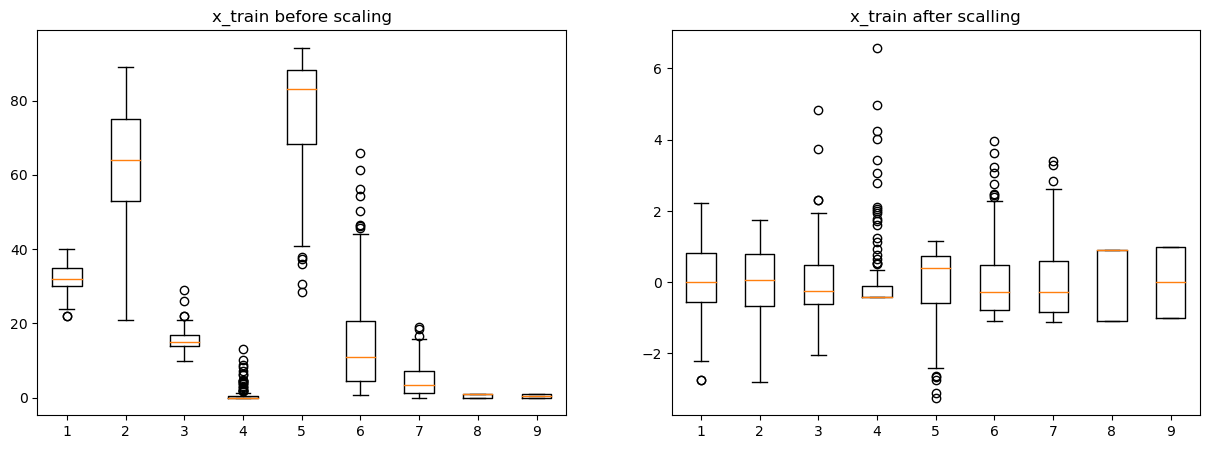

In [48]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(x_train)
plt.title("x_train before scaling")

plt.subplot(1,2,2)
plt.boxplot(x_train_scaled)
plt.title("x_train after scalling")

## Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()

linreg.fit(x_train_scaled ,y_train)
y_pred = linreg.predict(x_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(mae)
print(r2)

0.6097576371929286
0.9845036003441805


## Ridge Regression Model

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(x_train_scaled , y_train)
y_pred = ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(mae)
print(r2)

0.6329143779561449
0.983692581331822


## Lasso REgression Model

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(x_train_scaled , y_train)
y_pred = lasso.predict(x_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(mae)
print(r2)

1.1914563426451288
0.9507719280238188


## ElasticNet Regression

In [55]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(x_train_scaled , y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(mae)
print(r2)

1.8874633328409456
0.8803445600259008


In [56]:
## from above we consider ridge regression because it reduces overfitting and its accuracy outcome is higher in comparsion of lasso

In [57]:
import pickle

pickle.dump(scaler , open("scaler.pkl" , 'wb'))
pickle.dump(ridge , open("ridge.pkl" , 'wb'))
